In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Xdf = pd.read_csv('loan_prediction-1/X_train.csv')

In [3]:
Xdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban


In [4]:
Xdf.info()

# We don't have missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    int64  
 9   Loan_Amount_Term   384 non-null    int64  
 10  Credit_History     384 non-null    int64  
 11  Property_Area      384 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [5]:
Xdf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [6]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

Xdf['Credit_History'] = Xdf['Credit_History'].astype('O')

In [7]:
Xdf.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,384,384,384,384,384,384,384,384
unique,384,2,2,4,2,2,2,3
top,LP001811,Male,Yes,0,Graduate,No,1,Semiurban
freq,1,318,250,225,308,330,329,146


In [8]:
Ydf = pd.read_csv('loan_prediction-1/Y_train.csv')

In [9]:
Ydf

,Target
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
379,N
380,Y
381,Y
382,Y


In [10]:
target=list(Ydf['Target'])
Xdf.insert(11,"target",target)

The percentage of Y class : 0.71
The percentage of N class : 0.29


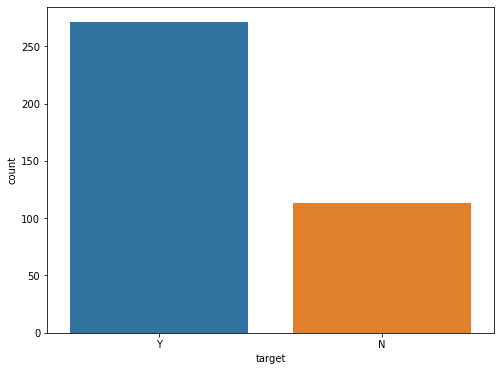

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(Xdf['target']);
print('The percentage of Y class : %.2f' % (Xdf['target'].value_counts()[0] / len(Ydf)))
print('The percentage of N class : %.2f' % (Xdf['target'].value_counts()[1] / len(Ydf)))

# let's look deeper in the data

In [12]:
Xdf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'target', 'Property_Area'],
      dtype='object')

In [13]:
# we will drop ID because it's not important for our model and it will just mislead the model

Xdf.drop('Loan_ID', axis=1, inplace=True)

In [14]:
Xdf.duplicated().any()


False

In [15]:
### first we will go through the categorical features
Xdf.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,Property_Area
0,Male,No,0,Graduate,No,4950,0.0,125,360,1,Y,Urban


In [16]:
Xdf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,Property_Area
0,Male,No,0,Graduate,No,4950,0.0,125,360,1,Y,Urban
1,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Y,Semiurban
2,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Y,Semiurban
3,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Y,Urban
4,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Y,Urban


# Feature Selection

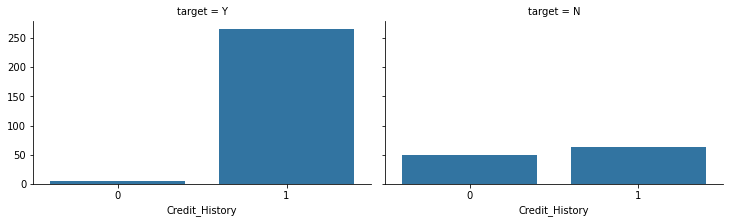

In [17]:
# Credit_History

grid = sns.FacetGrid(Xdf,col='target', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

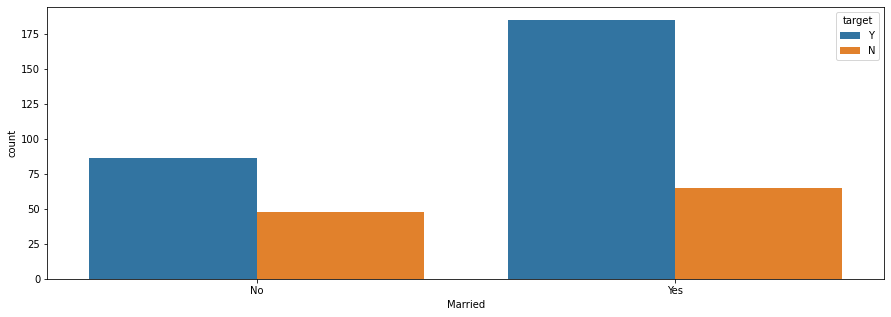

In [18]:


# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='target', data=Xdf);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature



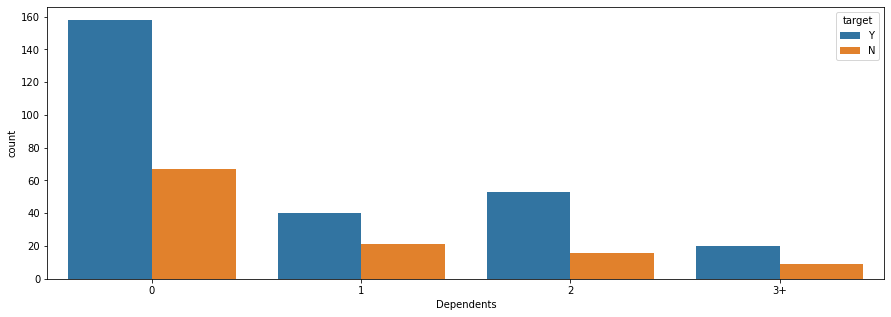

In [19]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='target', data=Xdf);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

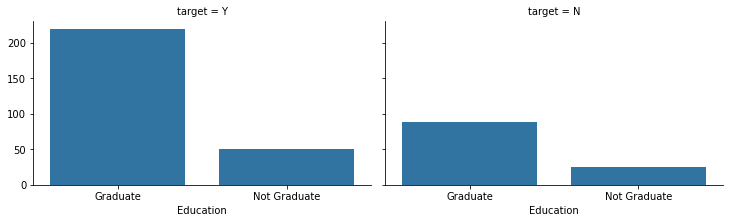

In [20]:
# Education

grid = sns.FacetGrid(Xdf,col='target', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

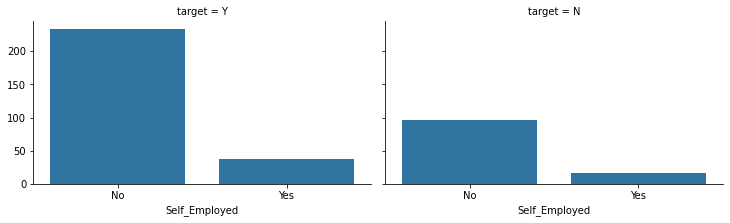

In [21]:
# Self_Employed

grid = sns.FacetGrid(Xdf,col='target', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

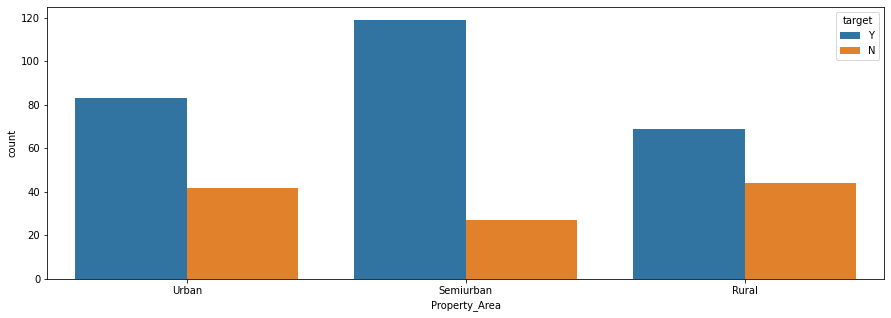

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='target', data=Xdf);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

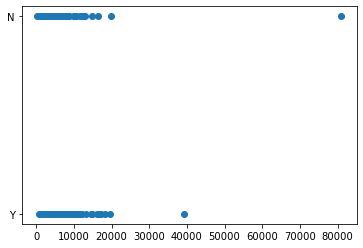

In [23]:
# ApplicantIncome

plt.scatter(Xdf['ApplicantIncome'], Xdf['target']);

# No pattern

In [24]:
cat_data = []
num_data = []

for i,c in enumerate(Xdf.dtypes):
    if c == object:
        cat_data.append(Xdf.iloc[:, i])
    else :
        num_data.append(Xdf.iloc[:, i])

In [25]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [26]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,target,Property_Area
0,Male,No,0,Graduate,No,1,Y,Urban
1,Male,Yes,1,Graduate,No,1,Y,Semiurban
2,Male,Yes,0,Graduate,No,1,Y,Semiurban
3,Male,Yes,2,Graduate,No,1,Y,Urban
4,Male,Yes,0,Graduate,No,1,Y,Urban


In [27]:

num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4950.0,0.0,125.0,360.0
1,2882.0,1843.0,123.0,480.0
2,3000.0,3416.0,56.0,180.0
3,9703.0,0.0,112.0,360.0
4,2333.0,2417.0,136.0,360.0


### categorical columns


In [28]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,target,Property_Area
0,Male,No,0,Graduate,No,1,Y,Urban
1,Male,Yes,1,Graduate,No,1,Y,Semiurban
2,Male,Yes,0,Graduate,No,1,Y,Semiurban
3,Male,Yes,2,Graduate,No,1,Y,Urban
4,Male,Yes,0,Graduate,No,1,Y,Urban


In [29]:
target_values = {'Y': 0 , 'N' : 1}

target = cat_data['target']
cat_data.drop('target', axis=1, inplace=True)

target = target.map(target_values)

In [30]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [31]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [32]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,1
2,1,1,0,0,0,1,1
3,1,1,2,0,0,1,2
4,1,1,0,0,0,1,2


In [33]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,target
0,1,0,0,0,0,1,2,4950.0,0.0,125.0,360.0,0
1,1,1,1,0,0,1,1,2882.0,1843.0,123.0,480.0,0
2,1,1,0,0,0,1,1,3000.0,3416.0,56.0,180.0,0
3,1,1,2,0,0,1,2,9703.0,0.0,112.0,360.0,0
4,1,1,0,0,0,1,2,2333.0,2417.0,136.0,360.0,0


# Train the data


In [35]:
X_train = pd.concat([cat_data, num_data], axis=1)
y_train = target 

In [36]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,4950.0,0.0,125.0,360.0
1,1,1,1,0,0,1,1,2882.0,1843.0,123.0,480.0
2,1,1,0,0,0,1,1,3000.0,3416.0,56.0,180.0
3,1,1,2,0,0,1,2,9703.0,0.0,112.0,360.0
4,1,1,0,0,0,1,2,2333.0,2417.0,136.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
379,1,1,0,0,0,0,0,3597.0,2157.0,119.0,360.0
380,1,0,0,1,1,1,0,2583.0,2167.0,104.0,360.0
381,1,1,0,0,0,1,0,5923.0,2054.0,211.0,360.0
382,1,0,0,0,0,1,1,2971.0,2791.0,144.0,360.0


In [37]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
379    1
380    0
381    0
382    0
383    0
Name: target, Length: 384, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [40]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)



LogisticRegression :
  pre: 0.900
  rec: 0.478
  f1: 0.624
  loss: 5.846
  acc: 0.831
------------------------------
KNeighborsClassifier :
  pre: 0.660
  rec: 0.292
  f1: 0.405
  loss: 8.725
  acc: 0.747
------------------------------
DecisionTreeClassifier :
  pre: 0.909
  rec: 0.442
  f1: 0.595
  loss: 6.116
  acc: 0.823
------------------------------


In [41]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train , y_train, skf)

LogisticRegression :
 pre     0.892857
 rec     0.451515
 f1      0.583669
 loss    6.203943
 acc     0.820378
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.313333
 rec      0.150000
 f1       0.193744
 loss    12.324043
 acc      0.643185
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.913333
 rec     0.442424
 f1      0.581382
 loss    6.113048
 acc     0.823009
Name: 0, dtype: float64
------------------------------


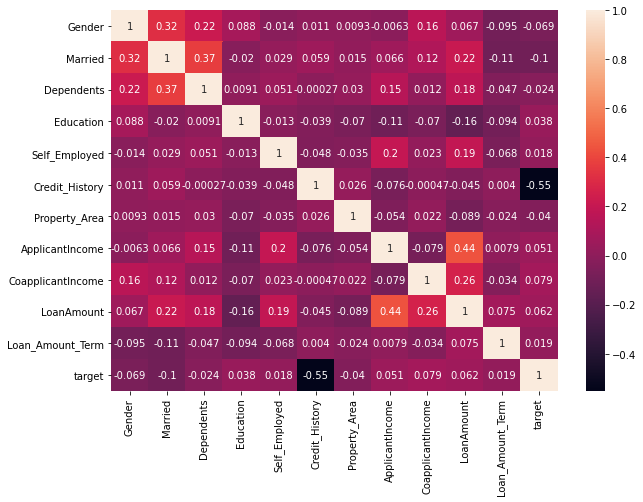

In [42]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [43]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

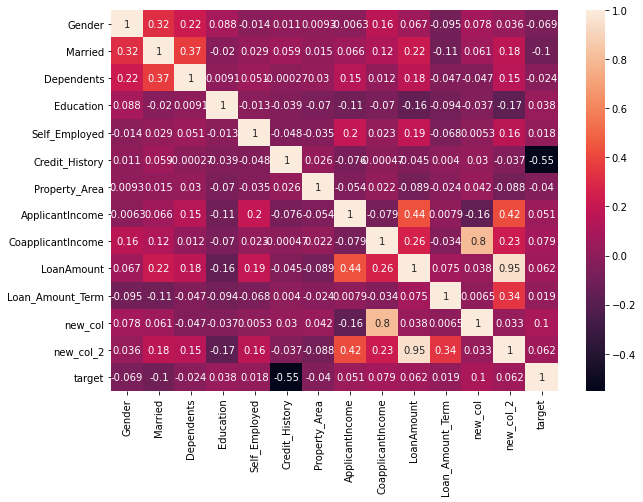

In [44]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [45]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [46]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.161205
 acc      0.705803
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.373939
 rec      0.184848
 f1       0.243449
 loss    11.338205
 acc      0.671727
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.913333
 rec     0.442424
 f1      0.581382
 loss    6.113048
 acc     0.823009
Name: 0, dtype: float64
------------------------------


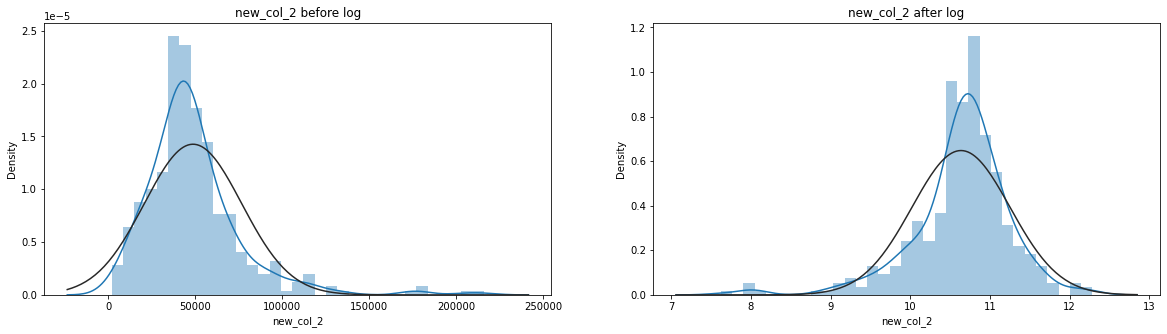

In [47]:

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [48]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.904603
 rec     0.468939
 f1      0.603819
 loss    5.933597
 acc     0.828205
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.697024
 rec     0.312121
 f1      0.417783
 loss    8.352729
 acc     0.758165
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.913333
 rec     0.442424
 f1      0.581382
 loss    6.113048
 acc     0.823009
Name: 0, dtype: float64
------------------------------


In [49]:
print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    172
0.735294      2
0.774598      1
0.504299      1
0.397873      1
           ... 
0.269873      1
0.844471      1
0.700444      1
0.824568      1
0.617405      1
Name: new_col, Length: 212, dtype: int64
--------------------------------------------------

after:
1.0    212
0.0    172
Name: new_col, dtype: int64


In [50]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.913333
 rec     0.442424
 f1      0.581382
 loss    6.113048
 acc     0.823009
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.629643
 rec     0.293939
 f1      0.383506
 loss    8.807193
 acc     0.745007
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.913333
 rec     0.442424
 f1      0.581382
 loss    6.113048
 acc     0.823009
Name: 0, dtype: float64
------------------------------


## Outliers

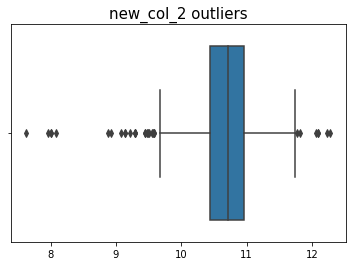

In [51]:

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [52]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.43469918913748 , Quartile 75: 10.961277846683982
iqr: 0.5265786575465032
Cut Off: 0.7898679863197549
Lower: 9.644831202817723
Upper: 11.751145833003736
Nubers of Outliers: 30
outliers:[9.21830854162536, 9.287301413112312, 7.620705086838262, 8.083328608786376, 9.144200569471638, 9.287301413112312, 11.772208062900312, 12.092679958175083, 12.090661794018846, 8.881836305004146, 9.084777149000837, 9.574983485564092, 12.283033686666302, 12.059890135352092, 11.81569317484005, 9.549665677579801, 12.231740392278752, 9.587406005562649, 9.287301413112312, 9.441452092939569, 9.578311275656766, 9.469622969906265, 9.483416292038601, 9.51044496442652, 8.006367567650246, 8.922658299524402, 9.441452092939569, 9.137769679141348, 8.006367567650246, 7.965545573129992]

len X_train before dropping the outliers 384
len X_train before dropping the outliers 354


In [53]:
X_train = data_outliers.drop('target', axis=1)
y_train = data_outliers['target']


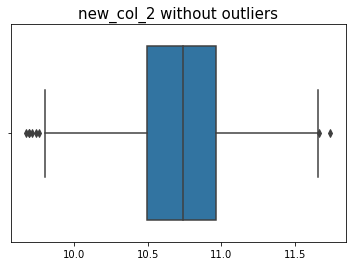

In [54]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

In [55]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.917143
 rec     0.455455
 f1      0.597755
 loss    5.951097
 acc     0.827698
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.781310
 rec     0.280000
 f1      0.383783
 loss    8.390757
 acc     0.757063
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.917143
 rec     0.455455
 f1      0.597755
 loss    5.951097
 acc     0.827698
Name: 0, dtype: float64
------------------------------


# Test the model

In [56]:
Xtest = pd.read_csv('loan_prediction-1/X_test.csv')
Ytest=pd.read_csv('loan_prediction-1/Y_test.csv')


In [57]:
Ytest

,Target
0,N
1,Y
2,Y
3,Y
4,Y
...,...
91,Y
92,Y
93,Y
94,Y


In [58]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

Xdf['Credit_History'] = Xdf['Credit_History'].astype('O')

In [59]:
target=(Ytest['Target'])
target = target.map(target_values)

In [60]:
Xtest.drop('Loan_ID', axis=1, inplace=True)
Xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,No,0,Not Graduate,No,3400,0,95,360,1,Rural
1,Male,Yes,0,Graduate,No,14583,0,436,360,1,Semiurban
2,Male,Yes,0,Graduate,No,2500,3796,120,360,1,Urban
3,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban
4,Male,Yes,2,Graduate,No,3859,0,96,360,1,Semiurban


In [61]:
cat_data = []
num_data = []

for i,c in enumerate(Xtest.dtypes):
    if c == object:
        cat_data.append(Xtest.iloc[:, i])
    else :
        num_data.append(Xtest.iloc[:, i])

In [62]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [63]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [64]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,0,0,1,0,0
1,1,1,0,0,0,1
2,1,1,0,0,0,2
3,1,1,1,0,0,2
4,1,1,2,0,0,1
...,...,...,...,...,...,...
91,1,1,3,0,0,1
92,1,1,1,0,0,2
93,1,1,3,0,0,1
94,1,1,2,1,0,0


In [65]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [66]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Target
0,0,0,0,1,0,0,3400,0,95,360,1,1
1,1,1,0,0,0,1,14583,0,436,360,1,0
2,1,1,0,0,0,2,2500,3796,120,360,1,0
3,1,1,1,0,0,2,3988,0,50,240,1,0
4,1,1,2,0,0,1,3859,0,96,360,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,3,0,0,1,39999,0,600,180,0,0
92,1,1,1,0,0,2,3052,1030,100,360,1,0
93,1,1,3,0,0,1,5167,3167,200,360,1,0
94,1,1,2,1,0,0,3987,1411,157,360,1,0


In [67]:
X_test = pd.concat([cat_data, num_data], axis=1)
y_test = target 

In [68]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,1,0,0,3400,0,95,360,1
1,1,1,0,0,0,1,14583,0,436,360,1
2,1,1,0,0,0,2,2500,3796,120,360,1
3,1,1,1,0,0,2,3988,0,50,240,1
4,1,1,2,0,0,1,3859,0,96,360,1
...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,3,0,0,1,39999,0,600,180,0
92,1,1,1,0,0,2,3052,1030,100,360,1
93,1,1,3,0,0,1,5167,3167,200,360,1
94,1,1,2,1,0,0,3987,1411,157,360,1


In [69]:
y_test

0     1
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: Target, Length: 96, dtype: int64

In [70]:
X_test_new = X_test.copy()
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [71]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.385
  rec: 0.286
  f1: 0.328
  loss: 14.751
  acc: 0.573
----------------------------------------
KNeighborsClassifier:
  pre: 0.400
  rec: 0.114
  f1: 0.178
  loss: 13.312
  acc: 0.615
----------------------------------------
DecisionTreeClassifier:
  pre: 0.385
  rec: 0.286
  f1: 0.328
  loss: 14.751
  acc: 0.573
----------------------------------------
